In [13]:
#Importar librerias
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Get the current directory
current_directory = os.getcwd()

# Specify the file name
file_name = 'robosenpanama.xlsx'

# Create the file path
file_path = os.path.join(current_directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    # Load the data
    df = pd.read_excel(file_path)

    # Convert 'periodo' to datetime if it's not already
    df['periodo'] = pd.to_datetime(df['periodo'])

    # Set the 'periodo' column as the index
    df.set_index('periodo', inplace=True)

    # Ensure the index has a frequency set
    df = df.asfreq('MS')

    # Fit the ARIMA model
    model = ARIMA(df['robos'], order=(1, 1, 1))
    model_fit = model.fit()

    # Print the model summary
    print(model_fit.summary())
else:
    print(f"Error: File not found at {file_path}")

    # Print the current working directory to help diagnose the issue
    print(f"Current working directory: {current_directory}")


                               SARIMAX Results                                
Dep. Variable:                  robos   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.765
Date:                Sat, 07 Sep 2024   AIC                            361.529
Time:                        04:48:12   BIC                            366.019
Sample:                    03-01-2021   HQIC                           363.040
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4338      0.342     -1.270      0.204      -1.103       0.236
ma.L1          0.0429      0.367      0.117      0.907      -0.676       0.762
sigma2      2781.0365    730.064      3.809      0.0

In [29]:
from tabulate import tabulate

# Suponiendo que 'forecast' es un array o lista de valores pronosticados
forecast = model_fit.forecast(steps=6)

# Crear una lista de listas para tabulate
forecast_data = [[i+1, forecast[i]] for i in range(len(forecast))]

# Definir los encabezados de la tabla
headers = ["Periodo", "Valor Pronosticado"]

# Imprimir la tabla usando tabulate
print(tabulate(forecast_data, headers=headers, tablefmt="grid"))

+-----------+----------------------+
|   Periodo |   Valor Pronosticado |
+===========+======================+
|         1 |              488.966 |
+-----------+----------------------+
|         2 |              494.62  |
+-----------+----------------------+
|         3 |              492.167 |
+-----------+----------------------+
|         4 |              493.231 |
+-----------+----------------------+
|         5 |              492.77  |
+-----------+----------------------+
|         6 |              492.97  |
+-----------+----------------------+


<ipython-input-29-b42d5233f7d2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_data = [[i+1, forecast[i]] for i in range(len(forecast))]


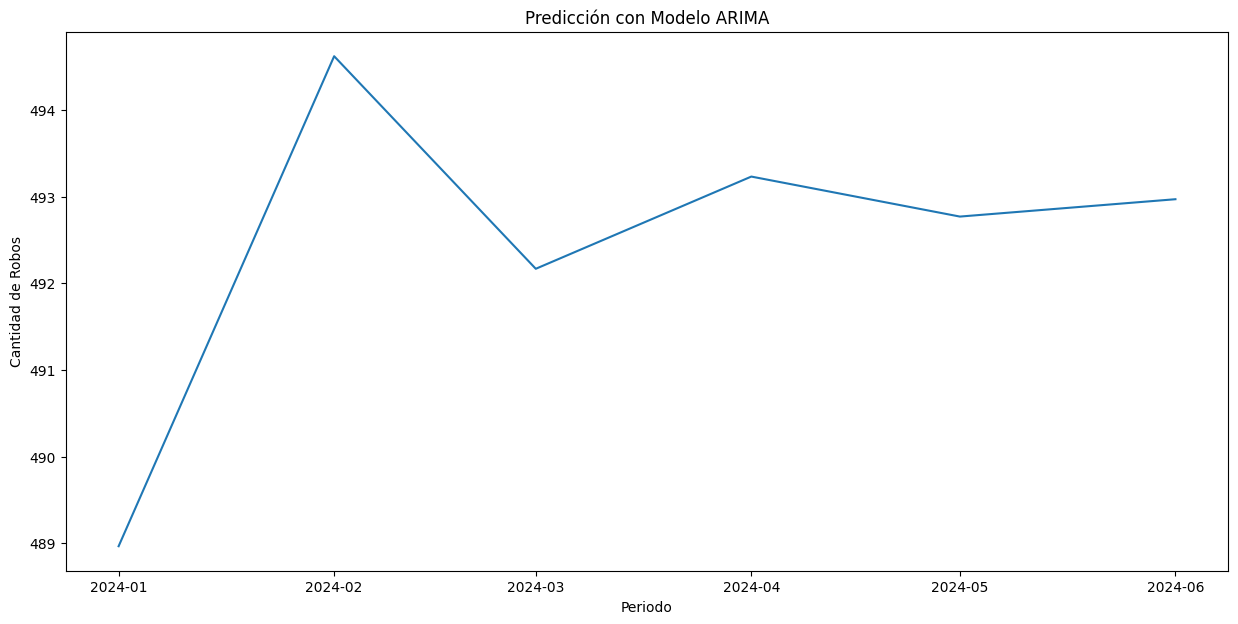

In [19]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(15, 7))
plt.plot(forecast)
plt.title('Predicción con Modelo ARIMA')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Robos')
plt.show()

In [28]:
import os
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from tabulate import tabulate

# Get the model residuals
residuals = model_fit.resid

# Calculate MAD
mad = np.mean(np.abs(residuals))

# Calculate MAPE
mape = np.mean(np.abs(residuals / df['robos'])) * 100

# Calcular la desviación estándar de los residuos
std_residuals = np.std(residuals)

# Calcular R^2
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((df['robos'] - np.mean(df['robos'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Crear un DataFrame para mostrar los resultados en una tabla
table = [['Metric', 'Value'],
         ['MAD', round(mad, 4)],
         ['MAPE', round(mape, 4)],
         ['STD', round(std_residuals, 4)],
         ['R^2', round(r_squared, 4)]]

# Mostrar la tabla con formato
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+---------+
| Metric   |   Value |
+==========+=========+
| MAD      | 54.6186 |
+----------+---------+
| MAPE     | 11.5528 |
+----------+---------+
| STD      | 92.9876 |
+----------+---------+
| R^2      | -1.6006 |
+----------+---------+
